# Завантаження зображень

In [133]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

car1 = imread("img/car1.png")
car2 = imread("img/car2.jpg")

## Виведемо їх

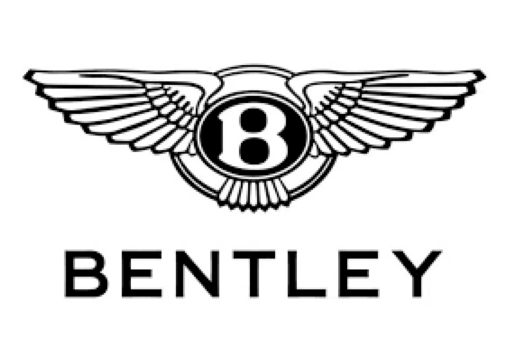

In [134]:
plt.imshow(car1)
plt.axis('off')  # сховати осі
plt.show()

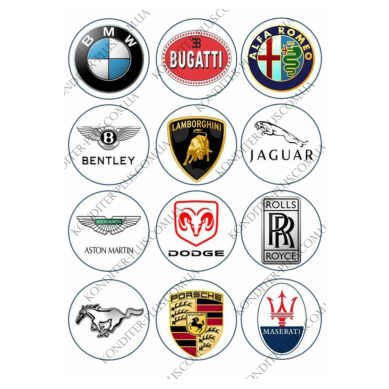

In [135]:
plt.imshow(car2)
plt.axis('off')  # сховати осі
plt.show()

# Застосовуємо SVD стиснення
## Оптимізуємо канали зображень

In [136]:
height1, width1, channels1 = car1.shape
flat_car1 = car1.reshape(-1, width1 * channels1)

height2, width2, channels2 = car2.shape
flat_car2 = car2.reshape(-1, width2 * channels2)

## Застосовуємо SVD декомпозицію

In [137]:
import numpy as np

U1, S1, Vt1 = np.linalg.svd(flat_car1, full_matrices=True)
U2, S2, Vt2 = np.linalg.svd(flat_car2, full_matrices=True)

## Виводимо перші k значень матриць
### Для car1.png

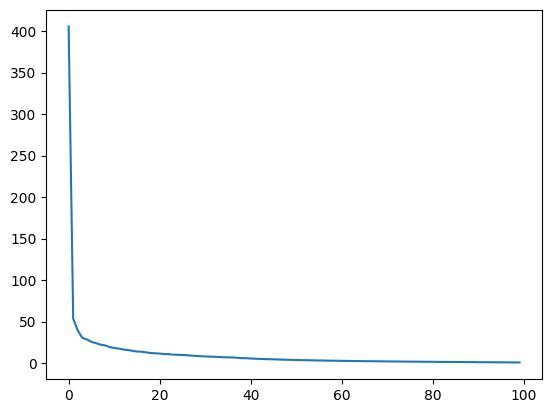

In [138]:
k = 100

plt.plot(np.arange(k), S1[:k])

### Для car2.jpg

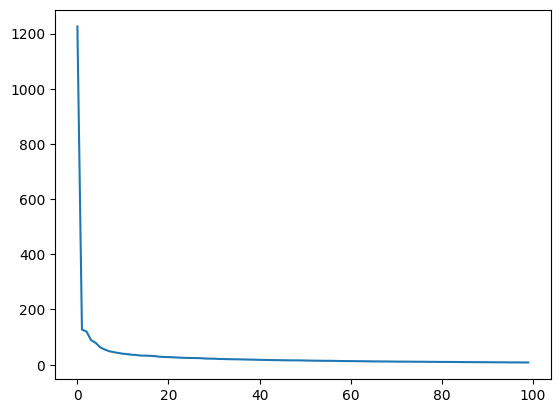

In [139]:
plt.plot(np.arange(k), S2[:k])

## Застосовуємо SVD стиснення
### Створюємо обʼєкт стискувача

In [140]:
from sklearn.decomposition import TruncatedSVD

svd1 = TruncatedSVD(n_components=k)
svd2 = TruncatedSVD(n_components=k)

### Стискаємота та реконструюємо  car1.png

In [141]:
truncated_car1 = svd1.fit_transform(flat_car1)
reconstructed_car1=svd1.inverse_transform(truncated_car1)

### Стискаємо та реконструюємо car2.jpg

In [142]:
truncated_car2 = svd2.fit_transform(flat_car2)
reconstructed_car2=svd2.inverse_transform(truncated_car2)

### Виводимо середньоквадратичне відхилення між оригінальним та реконструйованим зображенням для car1

In [143]:
reconstruction_error1 = np.mean(np.square(reconstructed_car1 - flat_car1))
reconstruction_error1

np.float32(9.643304e-06)

### Виводимо середньоквадратичне відхилення між оригінальним та реконструйованим зображенням для car1

In [144]:
reconstruction_error2 = np.mean(np.square(reconstructed_car2 - flat_car2))
reconstruction_error2

np.float32(0.0018581563)

### Покажемо реконструйовані зображення

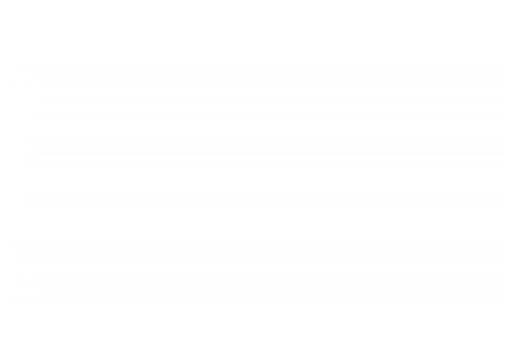

In [145]:
reconstructed_car1 = reconstructed_car1.reshape(height1, width1, channels1)
reconstructed_car1 = np.clip(reconstructed_car1, 0 , 255 ).astype( 'uint8' )

plt.imshow(reconstructed_car1)
plt.axis('off')
plt.show()

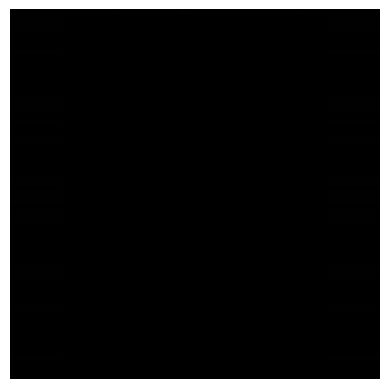

In [146]:
reconstructed_car2 = reconstructed_car2.reshape(height2, width2, channels2)
reconstructed_car2 = np.clip(reconstructed_car2, 0 , 255 ).astype( 'uint8' )

plt.imshow(reconstructed_car2)
plt.axis('off')
plt.show()

# Обʼєднаємо усі кроки у 2 функції